<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/ML_2_Credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# store elements as dictionary keys and their counts as dictionary values
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv("/content/drive/MyDrive/April_ass_2023_ML/ML_P2/bankloans.csv")

In [56]:
df.shape

(850, 9)

In [57]:
df.head(20)

age  ed  employ  address  income  debtinc   creddebt    othdebt  default
0    41   3      17       12     176      9.3  11.359392   5.008608      1.0
1    27   1      10        6      31     17.3   1.362202   4.000798      0.0
2    40   1      15       14      55      5.5   0.856075   2.168925      0.0
3    41   1      15       14     120      2.9   2.658720   0.821280      0.0
4    24   2       2        0      28     17.3   1.787436   3.056564      1.0
5    41   2       5        5      25     10.2   0.392700   2.157300      0.0
6    39   1      20        9      67     30.6   3.833874  16.668126      0.0
7    43   1      12       11      38      3.6   0.128592   1.239408      0.0
8    24   1       3        4      19     24.4   1.358348   3.277652      1.0
9    36   1       0       13      25     19.7   2.777700   2.147300      0.0
10   27   1       0        1      16      1.7   0.182512   0.089488      0.0
11   25   1       4        0      23      5.2   0.252356   0.943644      0.0
12   52   1      24       14      64     10.0   3.929600   2.470400      0.0
13   37   1       6        9      29     16.3   1.715901   3.011099      0.0
14   48   1      22       15     100      9.1   3.703700   5.396300      0.0
15   36   2       9        6      49      8.6   0.817516   3.396484      1.0
16   36   2      13        6      41     16.4   2.918216   3.805784      1.0
17   43   1      23       19      72      7.6   1.181952   4.290048      0.0
18   39   1       6        9      61      5.7   0.563274   2.913726      0.0
19   41   3       0       21      26      1.7   0.099008   0.342992      0.0

In [58]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [60]:
df.duplicated().sum()

0

In [66]:
df1 = df.dropna(axis = 0, how ='any') 
df1

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0     41   3      17       12     176      9.3  11.359392  5.008608      1.0
1     27   1      10        6      31     17.3   1.362202  4.000798      0.0
2     40   1      15       14      55      5.5   0.856075  2.168925      0.0
3     41   1      15       14     120      2.9   2.658720  0.821280      0.0
4     24   2       2        0      28     17.3   1.787436  3.056564      1.0
..   ...  ..     ...      ...     ...      ...        ...       ...      ...
695   36   2       6       15      27      4.6   0.262062  0.979938      1.0
696   29   2       6        4      21     11.5   0.369495  2.045505      0.0
697   33   1      15        3      32      7.6   0.491264  1.940736      0.0
698   45   1      19       22      77      8.4   2.302608  4.165392      0.0
699   37   1      12       14      44     14.7   2.994684  3.473316      0.0

[700 rows x 9 columns]

In [67]:
df1.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [69]:
df1.shape

(700, 9)

In [70]:
####### Filtering only Numerical Feature ####
Numerical_feature = [features for features in df.columns if df[features].dtype!='O']
print(f"{Numerical_feature}")

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


In [10]:
####### Filtering only Categorical Feature ####
Categorical_feature = [features for features in df.columns if df[features].dtype =='O']
print(f"{Categorical_feature}")

[]


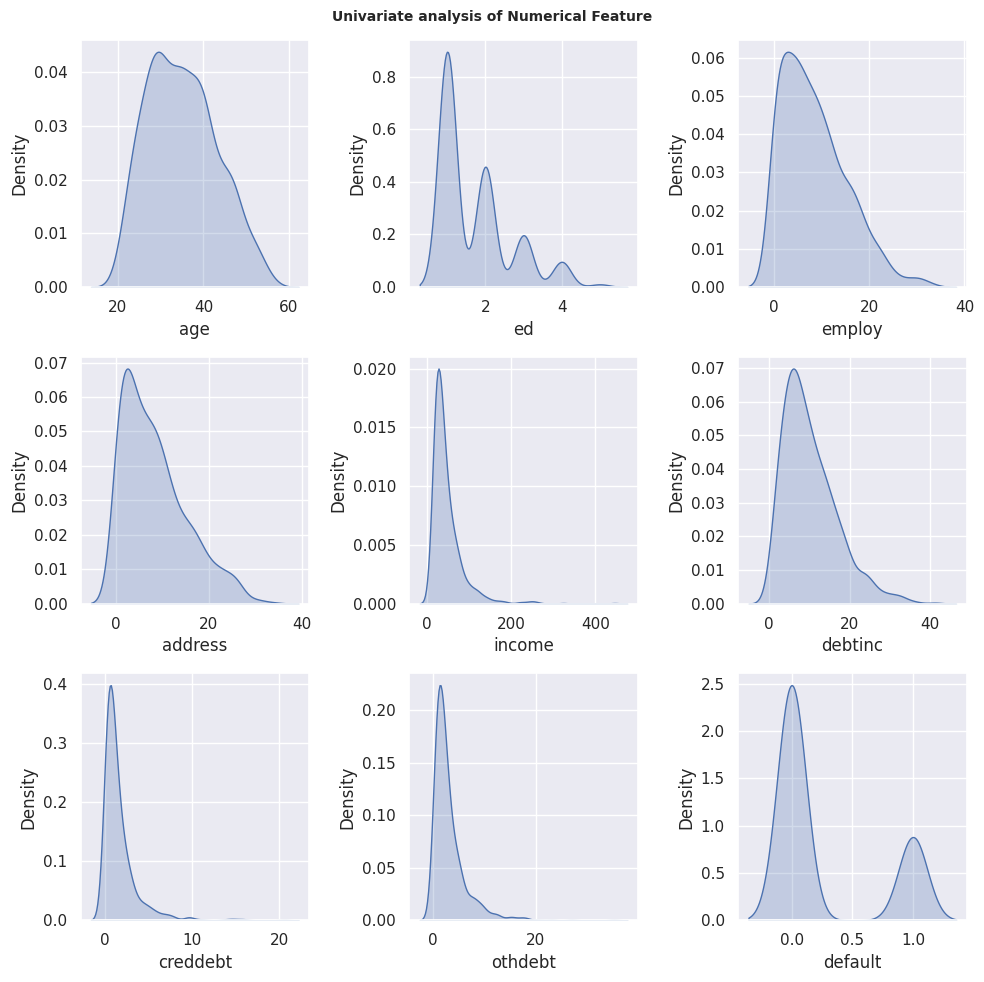

In [11]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysis of Numerical Feature', fontsize =10,fontweight= 'bold')

for i in range(0,len(Numerical_feature)):
    plt.subplot(3,3, i+1)
    sns.kdeplot(x=df[Numerical_feature[i]],shade=True,color='b')
    plt.xlabel(Numerical_feature[i])
    plt.tight_layout()

In [12]:
df1['default'].isnull().sum()

150

In [13]:
df1['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [14]:
#df['default'].unique()

array([ 1.,  0., nan])

In [15]:
#df['default'] = df['default'].fillna(df['default'].mode()[0])

In [16]:
#df['default'].nunique()

2

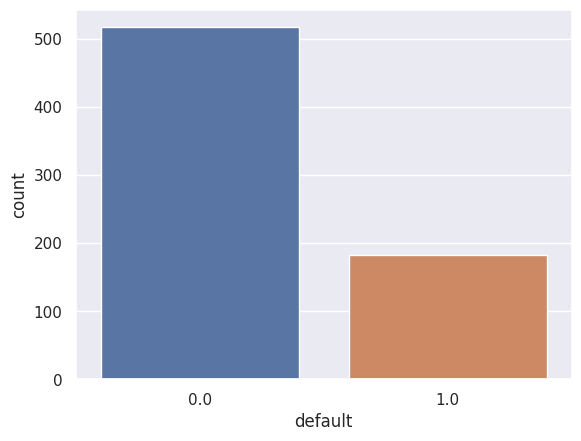

In [71]:
ax = sns.countplot(x='default',data= df1)

Target variable is not advised to be imputed (unless you are sure about the value), this is because they control how the learning algorithm learns. If you already know a value of target variable there is no need for a ML algorithm - right? Therefore, the best way to deal with missing target variable is to delete it. For other missing features, you can use impute strategies.

[link text](https://stackoverflow.com/questions/73644442/missing-value-in-target-variable#:~:text=Target%20variable%20is%20not%20advised,variable%20is%20to%20delete%20it.)

In [72]:
df1.corr()['default'].sort_values()

employ     -0.282978
address    -0.164451
age        -0.137657
income     -0.070970
ed          0.114676
othdebt     0.145713
creddebt    0.244740
debtinc     0.389575
default     1.000000
Name: default, dtype: float64

<Axes: >

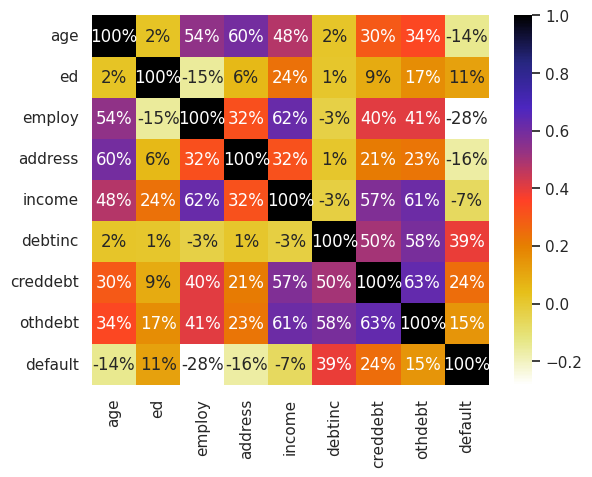

In [73]:
sns.heatmap(df1.corr(),cmap ="CMRmap_r", annot=True, fmt='.0%')

In [74]:
df1.describe().T

count       mean        std        min        25%        50%  \
age       700.0  34.860000   7.997342  20.000000  29.000000  34.000000   
ed        700.0   1.722857   0.928206   1.000000   1.000000   1.000000   
employ    700.0   8.388571   6.658039   0.000000   3.000000   7.000000   
address   700.0   8.278571   6.824877   0.000000   3.000000   7.000000   
income    700.0  45.601429  36.814226  14.000000  24.000000  34.000000   
debtinc   700.0  10.260571   6.827234   0.400000   5.000000   8.600000   
creddebt  700.0   1.553553   2.117197   0.011696   0.369059   0.854869   
othdebt   700.0   3.058209   3.287555   0.045584   1.044178   1.987567   
default   700.0   0.261429   0.439727   0.000000   0.000000   0.000000   

                75%        max  
age       40.000000   56.00000  
ed         2.000000    5.00000  
employ    12.000000   31.00000  
address   12.000000   34.00000  
income    55.000000  446.00000  
debtinc   14.125000   41.30000  
creddebt   1.901955   20.56131  
othdebt    3.923065   27.03360  
default    1.000000    1.00000

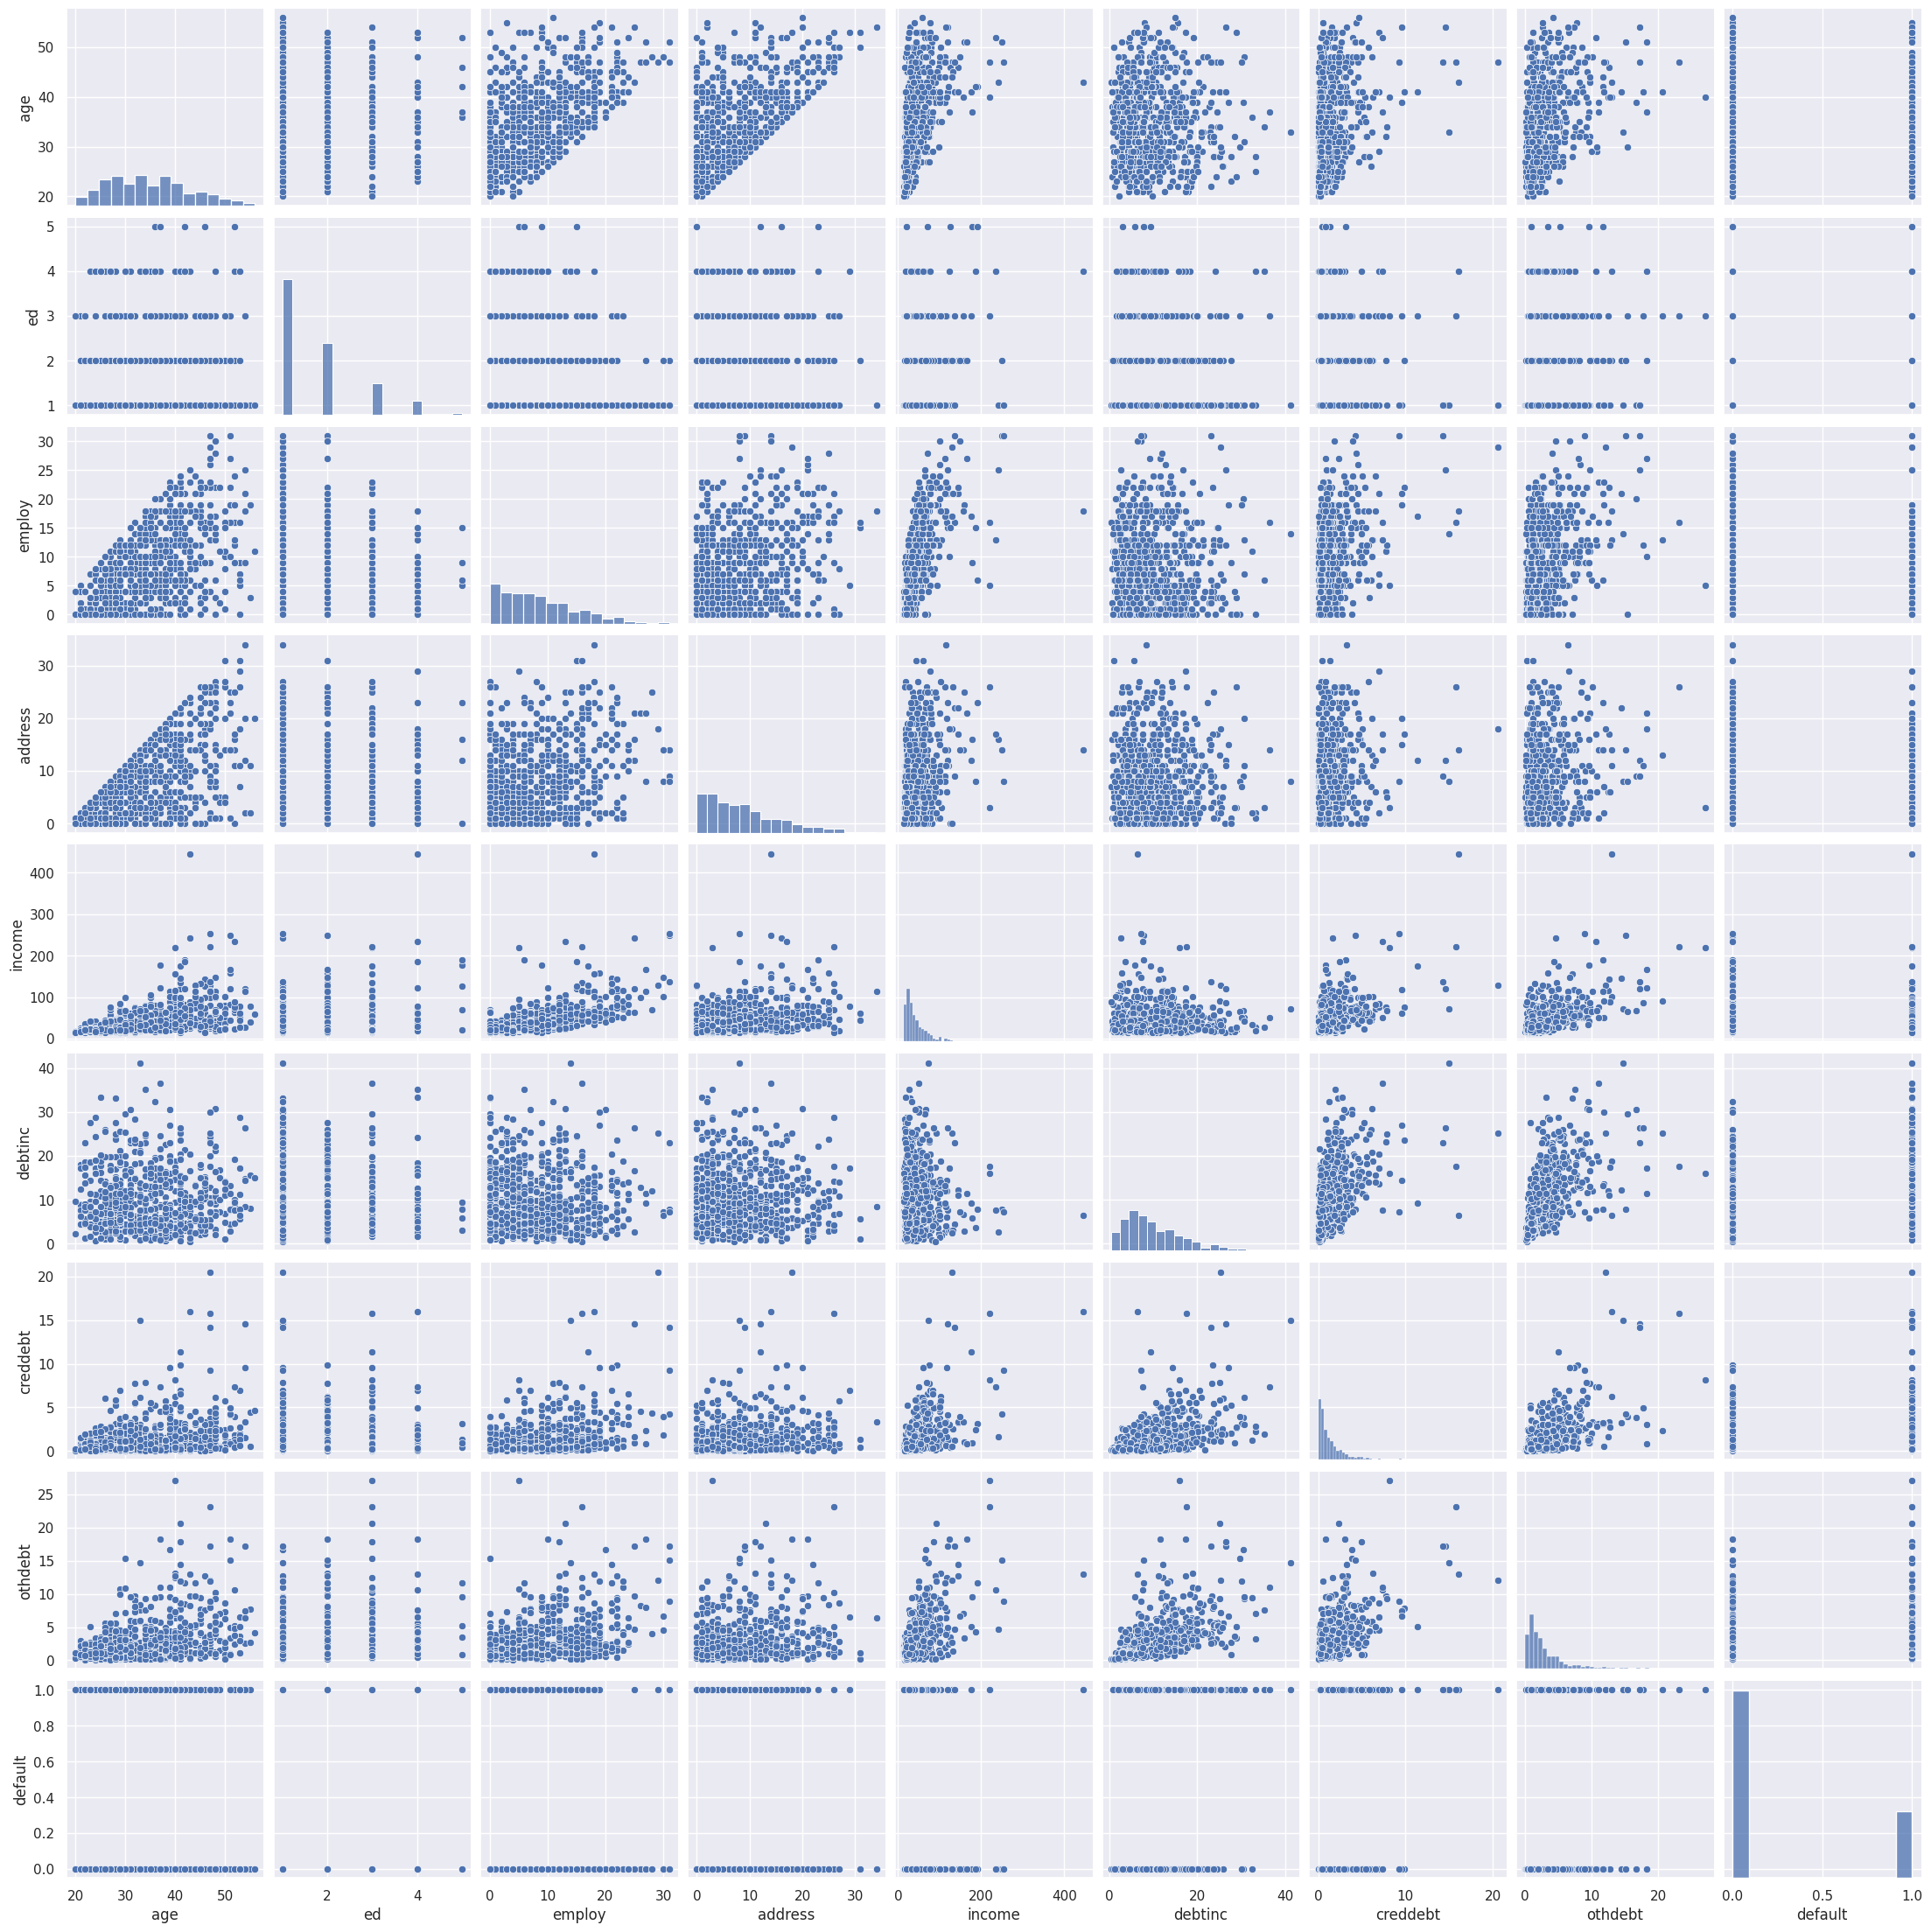

In [75]:
sns.pairplot(df1)

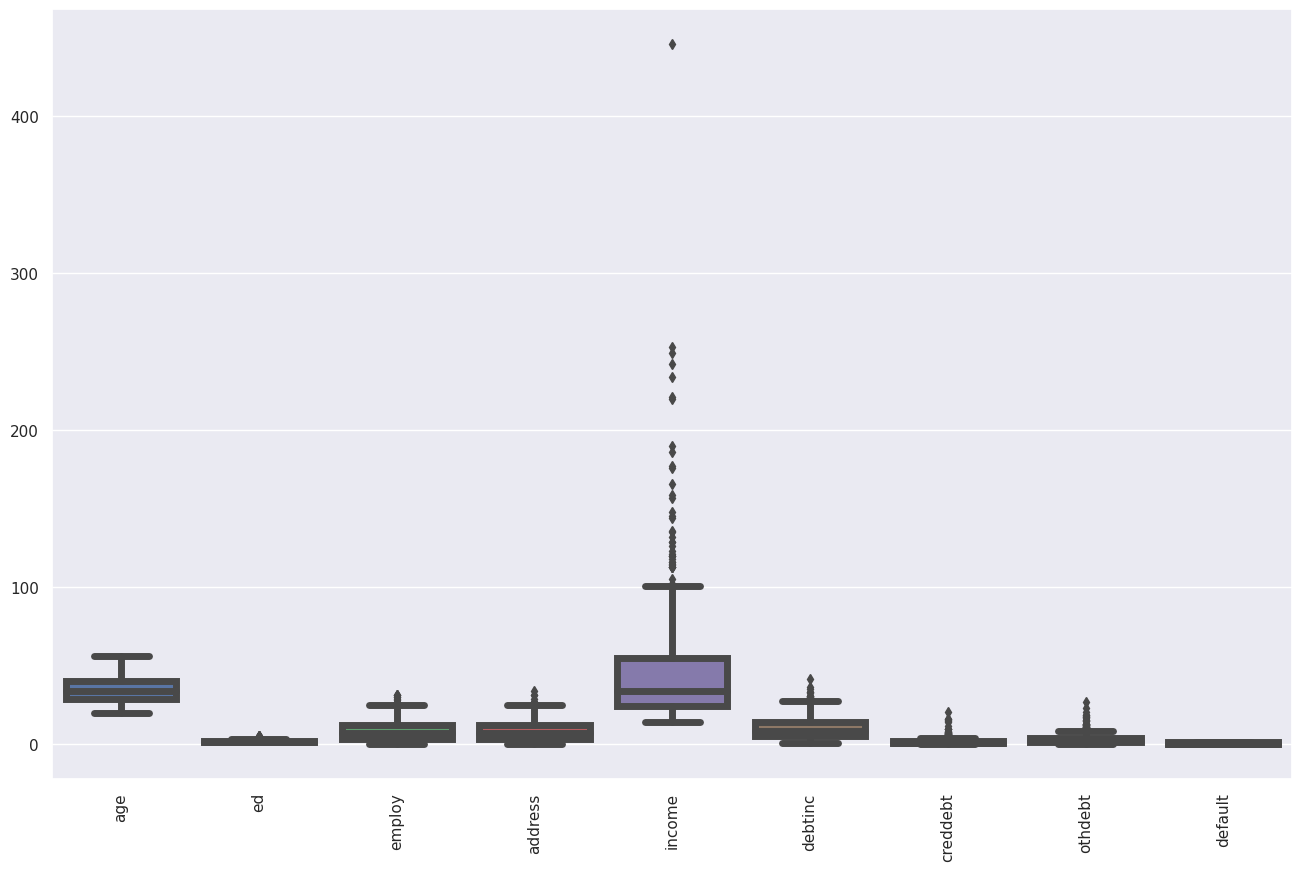

In [76]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df1, linewidth=5)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

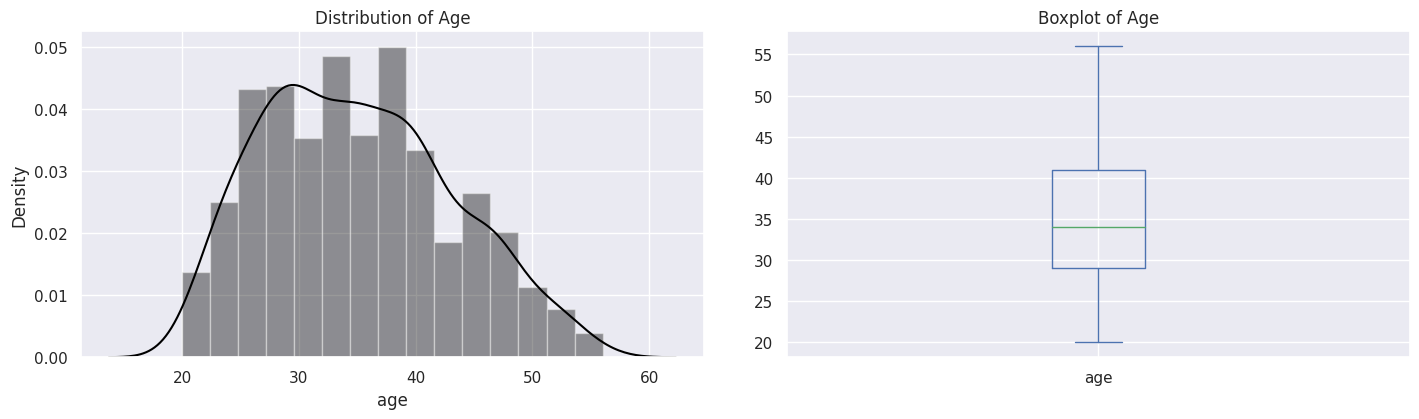

In [25]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['age'],color='black')
plt.title("Distribution of Age")
plt.subplot(122)
df['age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

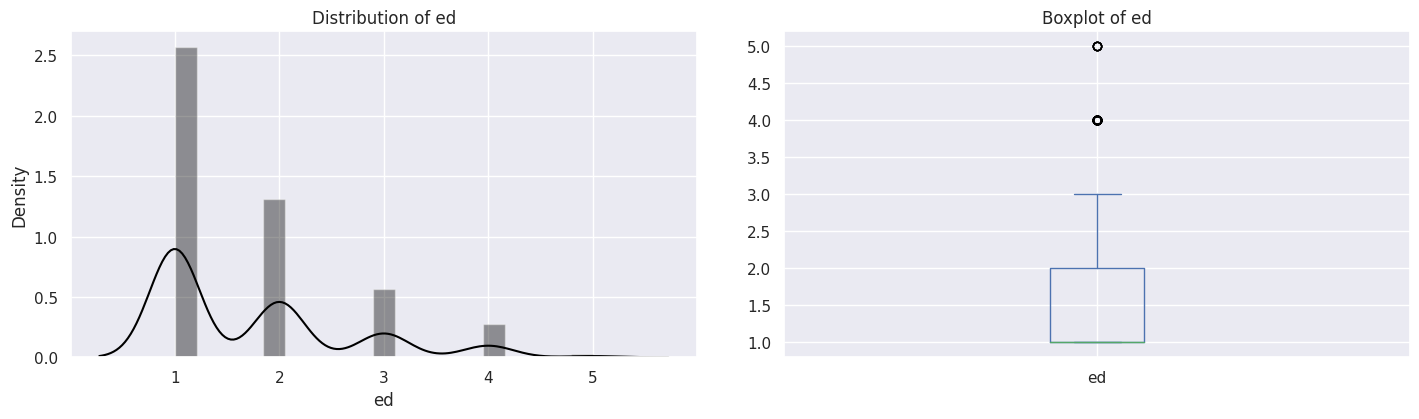

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['ed'],color='black')
plt.title("Distribution of ed")
plt.subplot(122)
df['ed'].plot.box(title='Boxplot of ed')
plt.tight_layout(pad=3)

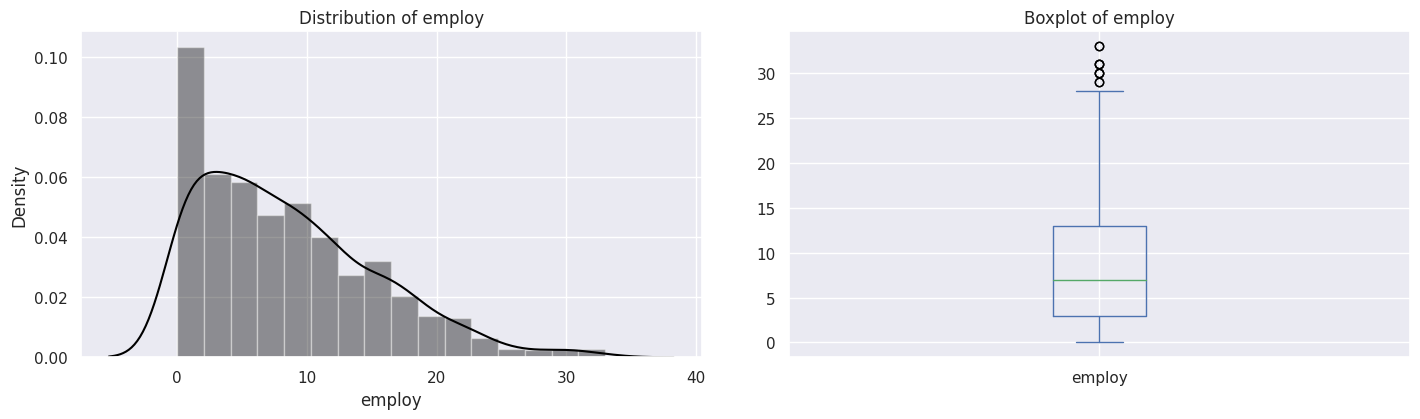

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['employ'],color='black')
plt.title("Distribution of employ")
plt.subplot(122)
df['employ'].plot.box(title='Boxplot of employ')
plt.tight_layout(pad=3)

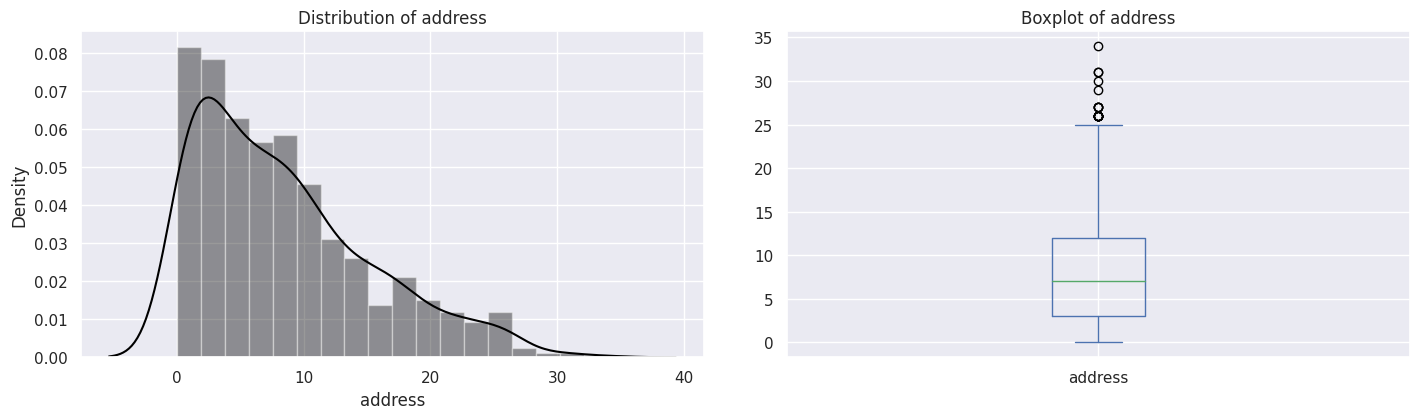

In [28]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['address'],color='black')
plt.title("Distribution of address")
plt.subplot(122)
df['address'].plot.box(title='Boxplot of address')
plt.tight_layout(pad=3)

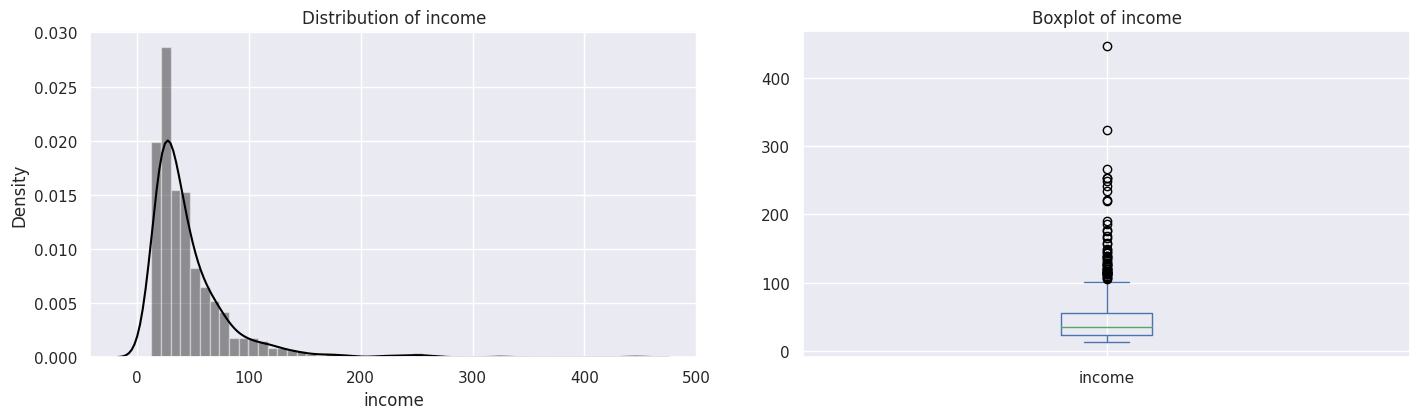

In [29]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['income'],color='black')
plt.title("Distribution of income")
plt.subplot(122)
df['income'].plot.box(title='Boxplot of income')
plt.tight_layout(pad=3)

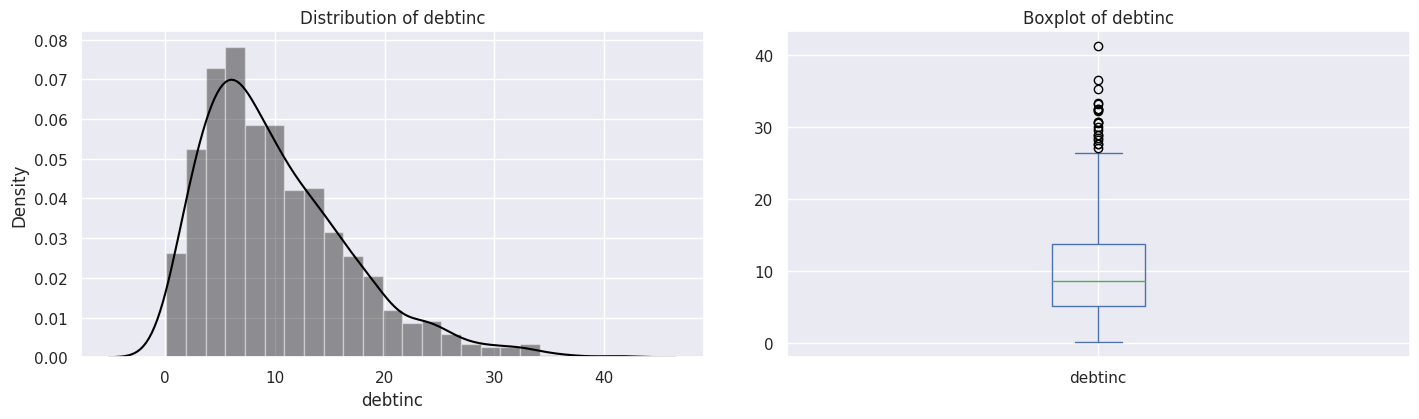

In [30]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['debtinc'],color='black')
plt.title("Distribution of debtinc")
plt.subplot(122)
df['debtinc'].plot.box(title='Boxplot of debtinc')
plt.tight_layout(pad=3)

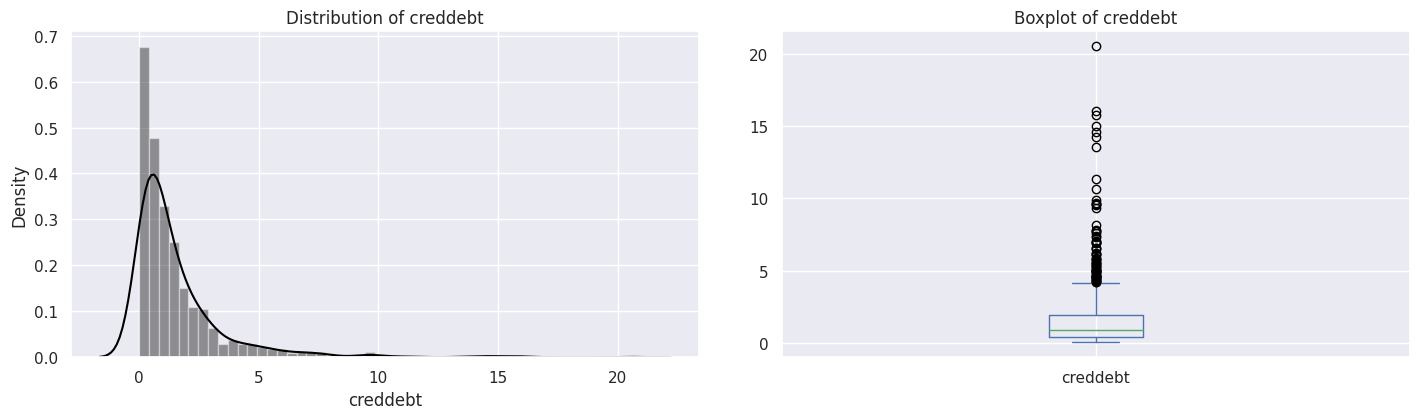

In [31]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['creddebt'],color='black')
plt.title("Distribution of creddebt")
plt.subplot(122)
df['creddebt'].plot.box(title='Boxplot of creddebt')
plt.tight_layout(pad=3)

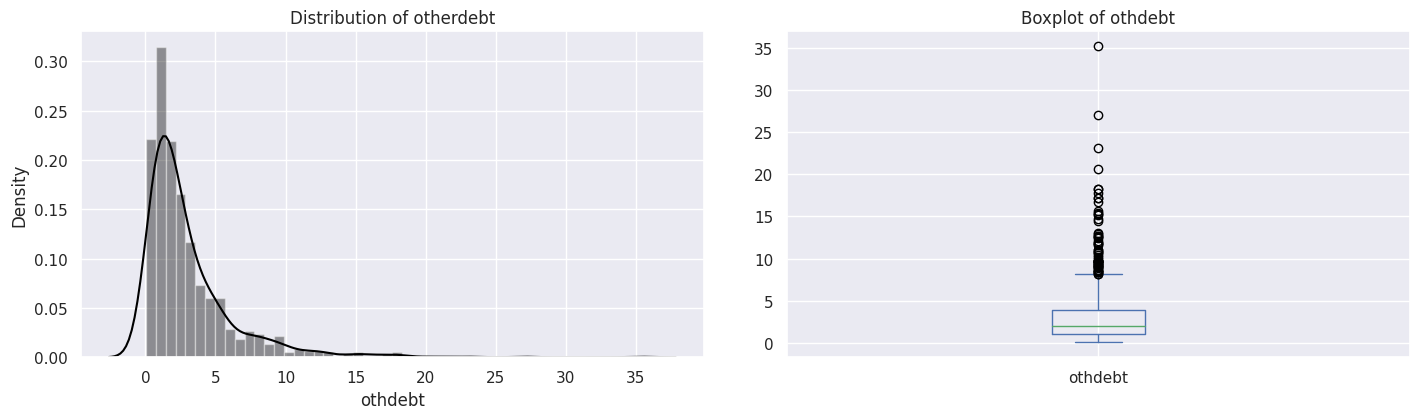

In [32]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['othdebt'],color='black')
plt.title("Distribution of otherdebt")
plt.subplot(122)
df['othdebt'].plot.box(title='Boxplot of othdebt')
plt.tight_layout(pad=3)

In [33]:
def detect_outliers(col):
  #finding IQR
  percentile75 = int(df[col].quantile(0.75))
  percentile25 = int(df[col].quantile(0.25))
  print('\n #####', col, '#####')
  print("percentile25=", percentile25)
  print("percentile75=", percentile75)
  IQR = percentile75 - percentile25
  #finding upper limit and lower Limit
  upper_limit = percentile75+1.5*IQR
  lower_limit = percentile25-1.5*IQR
  print("upper_limit:", upper_limit)
  print("lower_limit:", lower_limit)
  df.loc[(df[col]>upper_limit),col]=upper_limit
  df.loc[(df[col]<lower_limit),col]=lower_limit
  return df

In [34]:
for col in df:
  detect_outliers(col)


 ##### age #####
percentile25= 29
percentile75= 41
upper_limit: 59.0
lower_limit: 11.0

 ##### ed #####
percentile25= 1
percentile75= 2
upper_limit: 3.5
lower_limit: -0.5

 ##### employ #####
percentile25= 3
percentile75= 13
upper_limit: 28.0
lower_limit: -12.0

 ##### address #####
percentile25= 3
percentile75= 12
upper_limit: 25.5
lower_limit: -10.5

 ##### income #####
percentile25= 24
percentile75= 55
upper_limit: 101.5
lower_limit: -22.5

 ##### debtinc #####
percentile25= 5
percentile75= 13
upper_limit: 25.0
lower_limit: -7.0

 ##### creddebt #####
percentile25= 0
percentile75= 1
upper_limit: 2.5
lower_limit: -1.5

 ##### othdebt #####
percentile25= 1
percentile75= 3
upper_limit: 6.0
lower_limit: -2.0

 ##### default #####
percentile25= 0
percentile75= 0
upper_limit: 0.0
lower_limit: 0.0


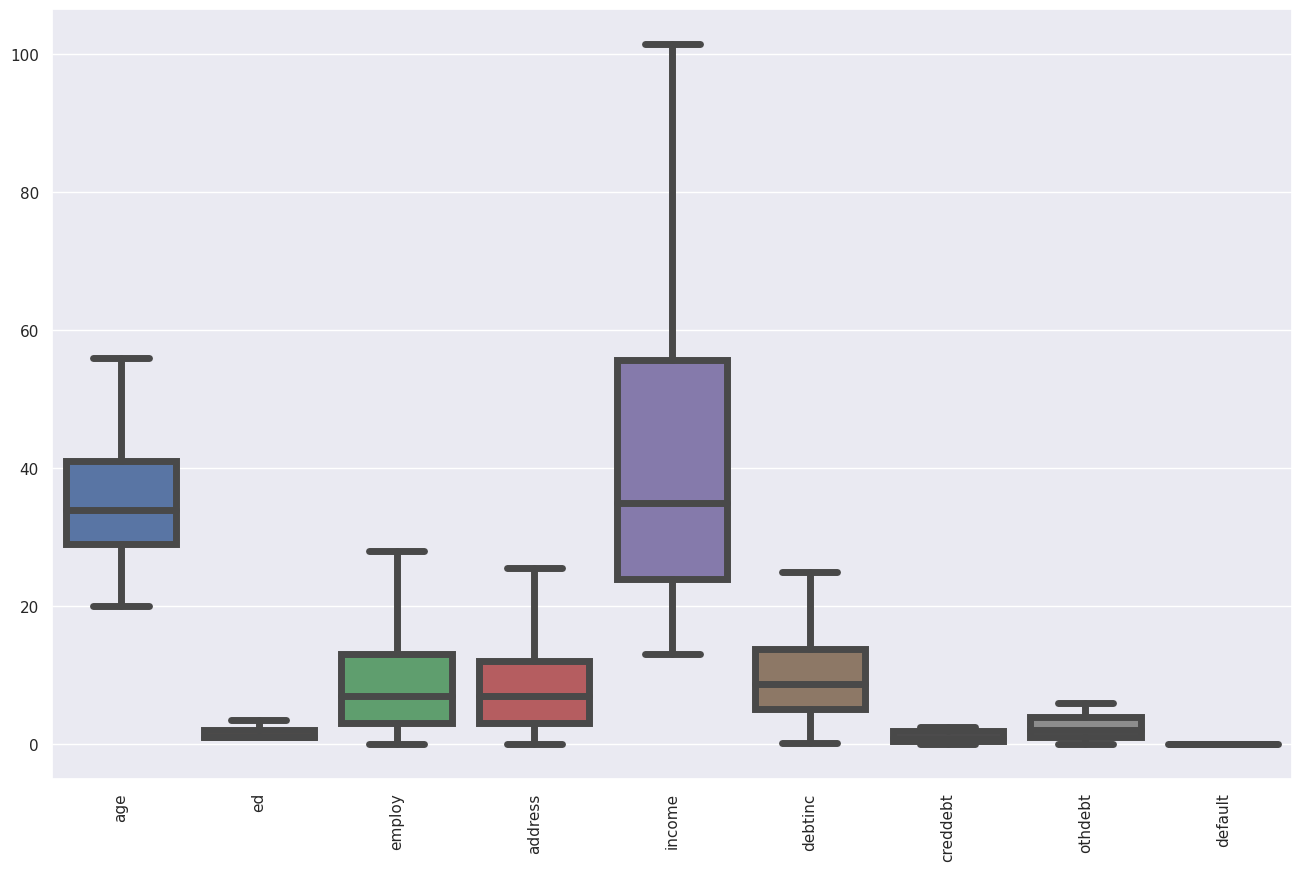

In [35]:
fig = plt.figure(figsize =(16, 10))
sns.boxplot(data= df, linewidth=5)
plt.xticks(rotation='vertical')
plt.show()

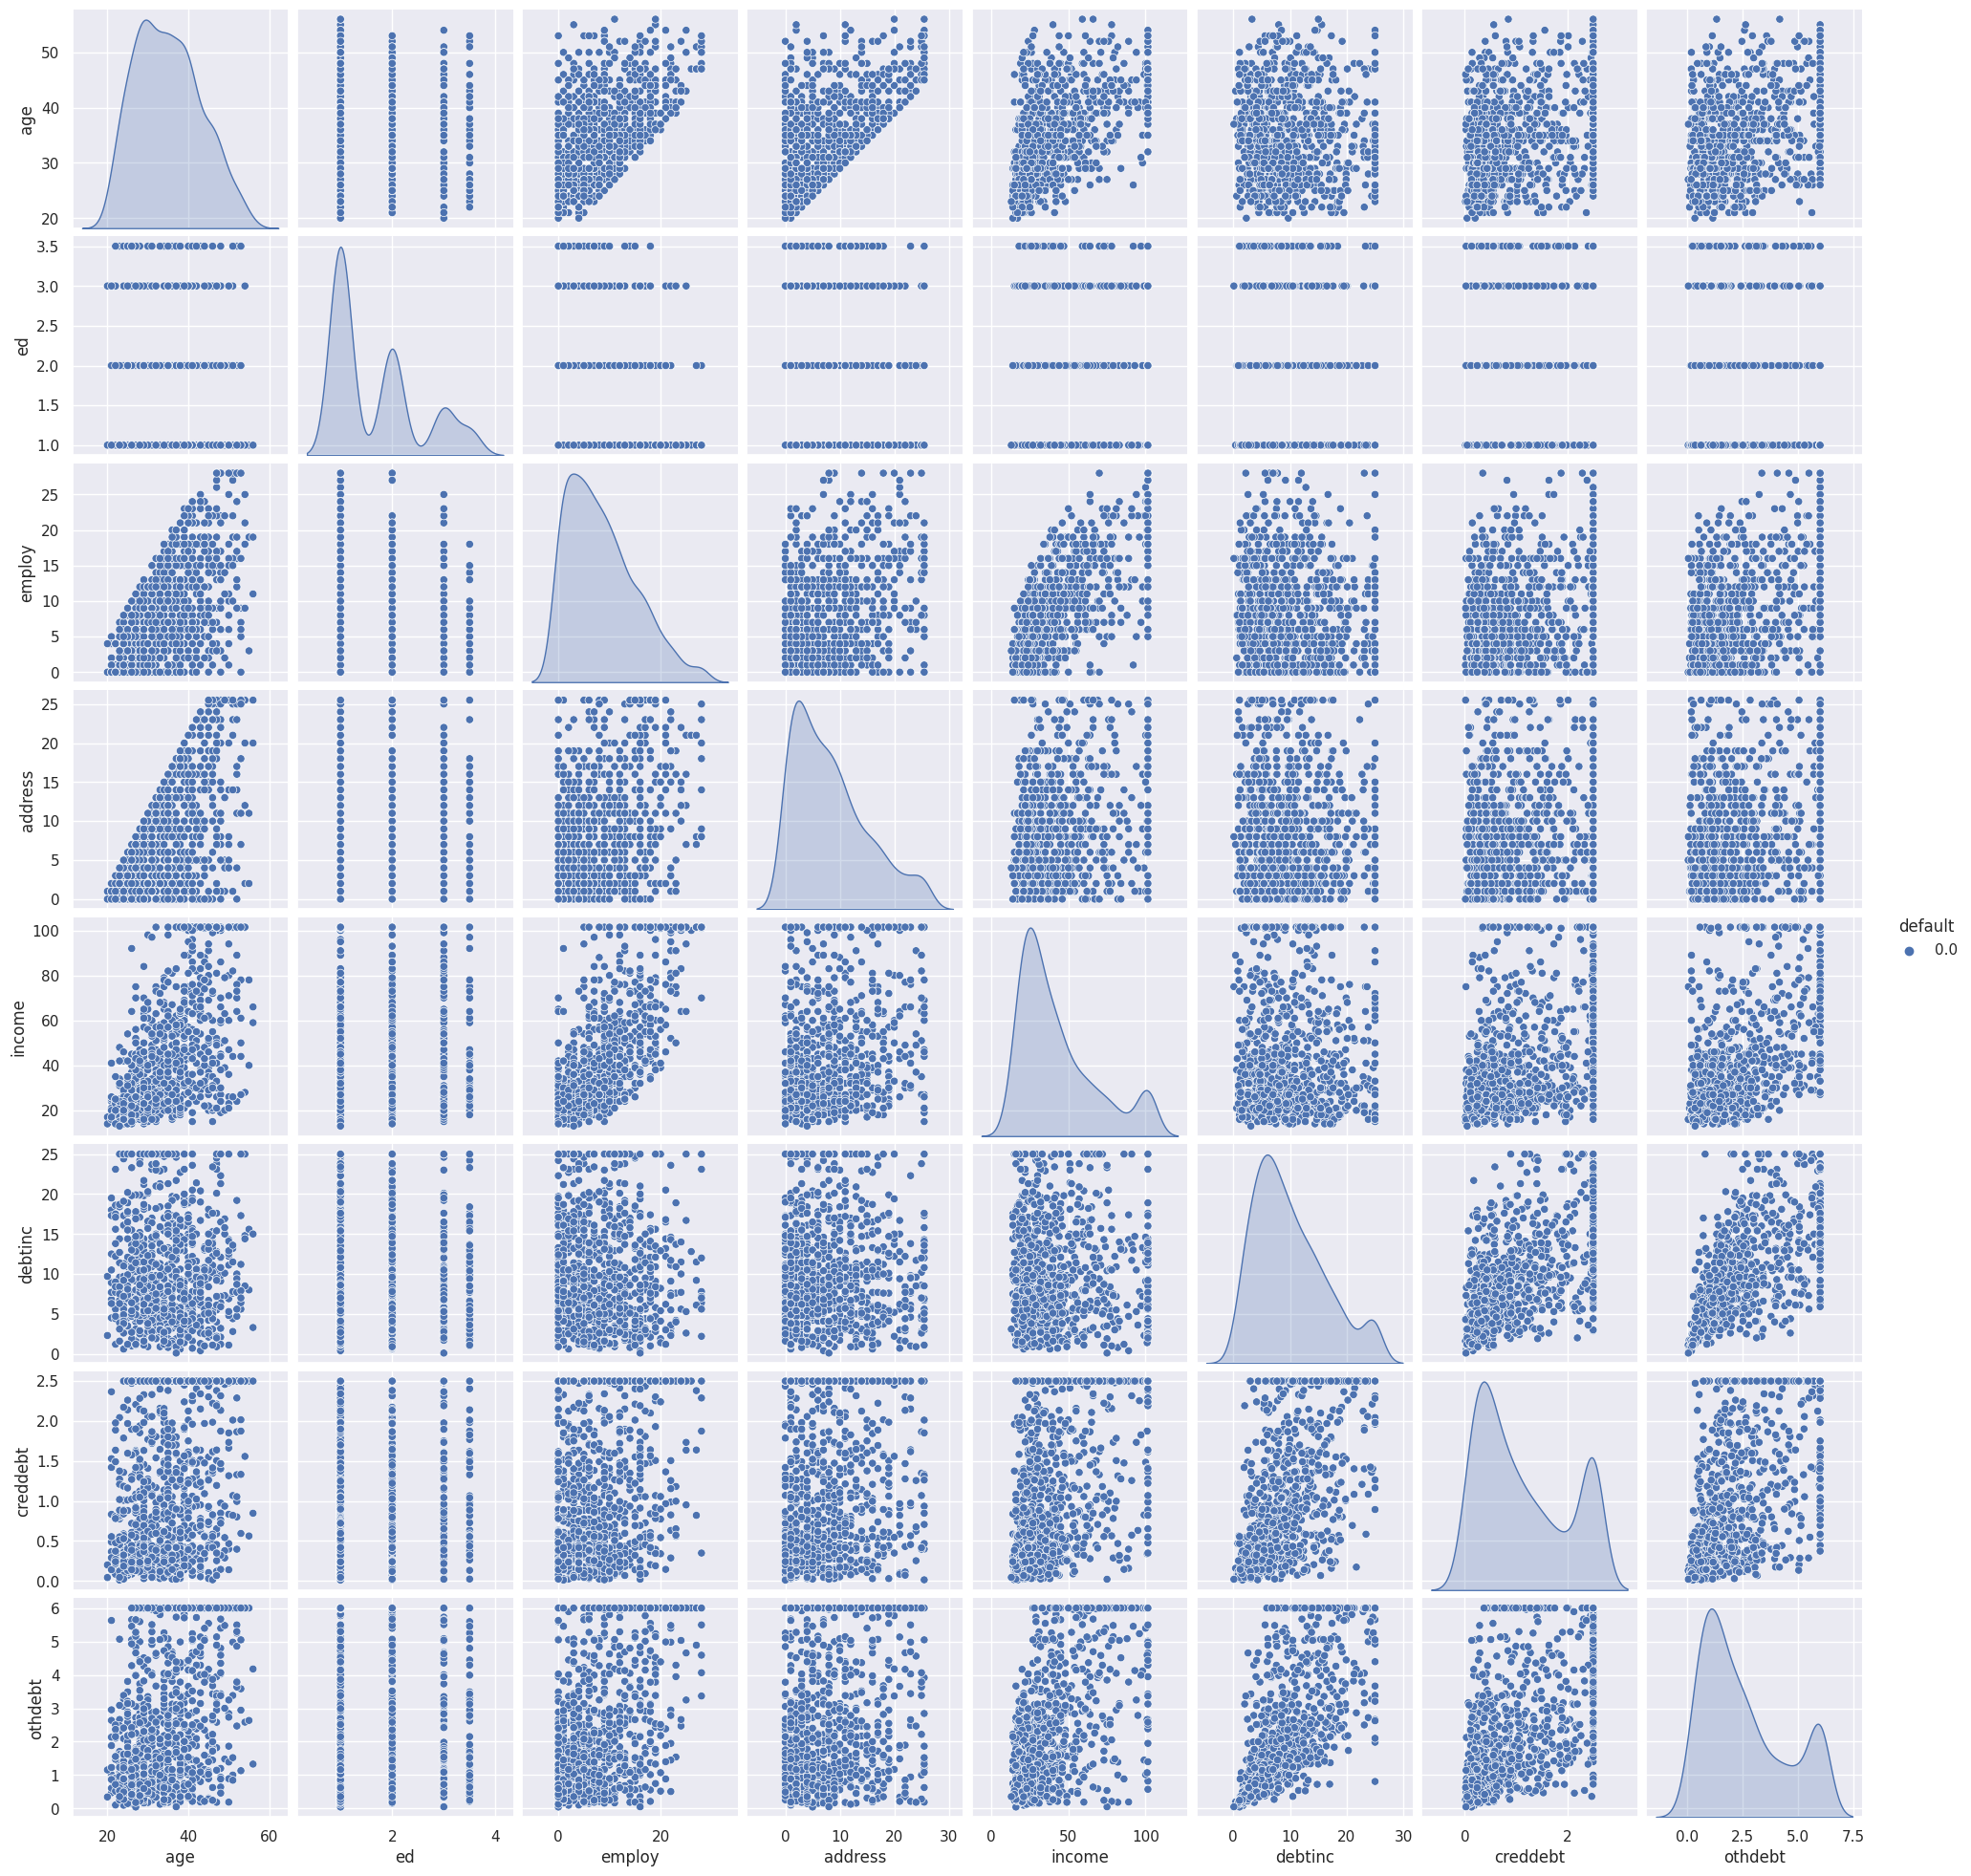

In [36]:
sns.pairplot(data=df,hue='default');

In [77]:
X=df1.drop("default",axis=1)
Y=df1['default']

In [78]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(X.shape[1]):
    VIF.append(variance_inflation_factor(X.values,j))
print(VIF)

import numpy as np
np.transpose(VIF)
pd.DataFrame(X.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

[16.65097764345202, 4.981879780996459, 5.703036212915268, 3.5314106471177715, 10.47718117059622, 8.639826440971778, 3.7182210368174937, 6.450958648050504]


0          0
0       age  16.650978
1        ed   4.981880
2    employ   5.703036
3   address   3.531411
4    income  10.477181
5   debtinc   8.639826
6  creddebt   3.718221
7   othdebt   6.450959

In [79]:
#Select K best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=8)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

print(kbest_features_rank.nlargest(9,'K_score'))

   Features     K_score
5   debtinc  481.922024
2    employ  295.793337
6  creddebt  120.804364
3   address  106.361694
4    income  104.634642
7   othdebt   52.450545
0       age   24.301797
1        ed    4.596824


[0.1070184  0.06386858 0.15946596 0.11480868 0.10536809 0.18730665
 0.14561722 0.11654641]


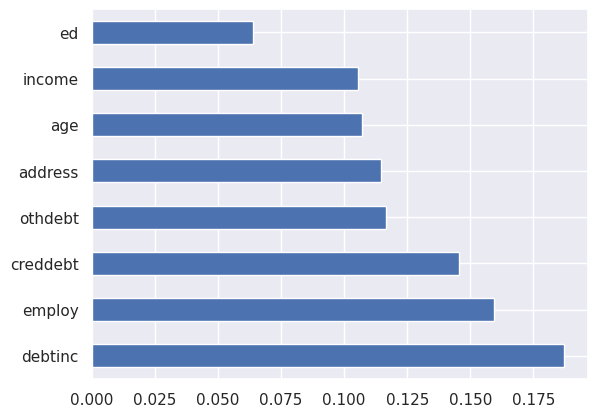

Features     Score
5   debtinc  0.187307
2    employ  0.159466
6  creddebt  0.145617
7   othdebt  0.116546
3   address  0.114809
0       age  0.107018
4    income  0.105368
1        ed  0.063869

In [80]:
#ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)
ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(10,'Score')

debtinc     0.101596
creddebt    0.075759
employ      0.051571
address     0.033899
age         0.017881
ed          0.015730
dtype: float64


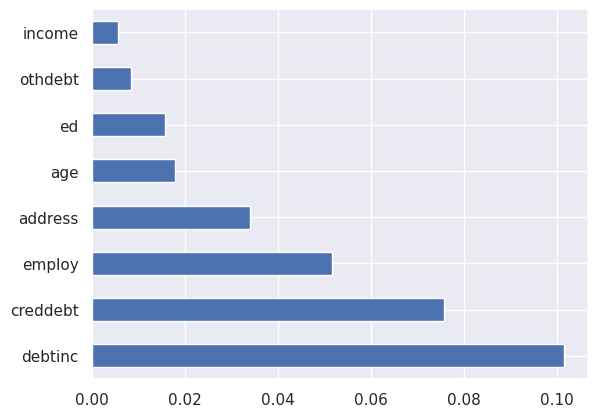

In [81]:
#Mutual Info Classifier

from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(6))

mutual_data.nlargest(13).plot(kind='barh')
plt.show()

In [82]:
threshold=0.4

# find and remove correlated features
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [83]:
correlation(df.iloc[:,:-2],threshold)

{'address', 'creddebt', 'employ', 'income'}

In [84]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [89]:
 rf_all_features = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 rf_all_features.fit(X,Y)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [90]:
 rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=12)
 boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
 boruta_selector.fit(np.array(X), np.array(Y))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	2
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(max_depth=12, n_estimators=28,
                                          random_state=RandomState(MT19937) at 0x7FC939C92D40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FC939C92D40, verbose=2)

In [91]:
print("Ranking: ",boruta_selector.ranking_)       
print("No. of significant features: ", boruta_selector.n_features_)

Ranking:  [2 5 1 4 3 1 1 1]
No. of significant features:  4


In [92]:
df1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [93]:
X= df1[['age','employ','income','debtinc','creddebt','othdebt']]
Y=df1['default']

In [94]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scale = scaler.fit_transform(X)

In [95]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=0,stratify=Y)

In [96]:
X_train.shape ,X_test.shape ,Y_train.shape,Y_test.shape

((490, 6), (210, 6), (490,), (210,))

In [97]:
"""**SMOTE Sampling**"""
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_SM, Y_train_SM = sm.fit_resample(X_train, Y_train)

print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_SM)))

The number of classes before fit Counter({0.0: 362, 1.0: 128})
The number of classes after fit Counter({1.0: 362, 0.0: 362})


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
logreg = LogisticRegression()
logreg.fit(X_train_SM,Y_train_SM)
y_pred_lr_SM = logreg.predict(X_test)

print(confusion_matrix(Y_test,y_pred_lr_SM))
print(accuracy_score(Y_test,y_pred_lr_SM))
print(classification_report(Y_test,y_pred_lr_SM))

[[113  42]
 [ 11  44]]
0.7476190476190476
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81       155
         1.0       0.51      0.80      0.62        55

    accuracy                           0.75       210
   macro avg       0.71      0.76      0.72       210
weighted avg       0.81      0.75      0.76       210



In [99]:
"""**KNN**"""
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1, p=2)

Knn = np.mean(cross_val_score(knn_clf,X_train_SM,Y_train_SM,scoring='accuracy',cv=10))
print(Knn)

0.856468797564688


In [100]:
from sklearn.model_selection import RandomizedSearchCV
knn_rs = RandomizedSearchCV(KNeighborsClassifier(), 
      {
        'n_neighbors': [1,3,5,6,7,8,9,11],
        'p': [1,2]
      }, 
    cv=10, 
    return_train_score=False, 
    n_iter=10
)
knn_rs.fit(X_train_SM,Y_train_SM)

pd.DataFrame(knn_rs.cv_results_)[['param_n_neighbors','param_p','mean_test_score']]

param_n_neighbors param_p  mean_test_score
0                 9       1         0.774886
1                 3       2         0.810864
2                11       1         0.776256
3                 8       1         0.792865
4                 1       2         0.856469
5                 5       1         0.802473
6                 5       2         0.798402
7                 1       1         0.857763
8                11       2         0.769406
9                 7       1         0.797013

In [101]:
knnbest = knn_rs.best_estimator_
print(knnbest)

KNeighborsClassifier(n_neighbors=1, p=1)


In [102]:
Y_pred_knn_SM = knnbest.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_knn_SM))
print(accuracy_score(Y_test,Y_pred_knn_SM))
print(classification_report(Y_test,Y_pred_knn_SM))

[[116  39]
 [ 29  26]]
0.6761904761904762
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       155
         1.0       0.40      0.47      0.43        55

    accuracy                           0.68       210
   macro avg       0.60      0.61      0.60       210
weighted avg       0.70      0.68      0.68       210



In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','poly']
}, cv=5, return_train_score=False)
clf.fit(X_train_SM,Y_train_SM)
clf.cv_results_

pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       1          rbf         0.784502
1       1       linear         0.769272
2       1         poly         0.729291
3      10          rbf         0.777605
4      10       linear         0.766513
5      10         poly         0.763812
6      20          rbf         0.783123
7      20       linear         0.766513
8      20         poly         0.761044

In [104]:
###Random Forest Classifier**

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_features = 0.3, n_estimators = 34)
RF.fit(X_train_SM,Y_train_SM)
Y_pred_rf_SM = RF.predict(X_test)

In [105]:
print(confusion_matrix(Y_test,Y_pred_rf_SM))
print(accuracy_score(Y_test,Y_pred_rf_SM))
print(classification_report(Y_test,Y_pred_rf_SM))

[[129  26]
 [ 24  31]]
0.7619047619047619
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       155
         1.0       0.54      0.56      0.55        55

    accuracy                           0.76       210
   macro avg       0.69      0.70      0.70       210
weighted avg       0.76      0.76      0.76       210



In [106]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [107]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_SM,Y_train_SM)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [108]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=1800)

In [109]:
 rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'entropy'}

In [110]:
best_random_grid=rf_randomcv.best_estimator_

In [111]:
from sklearn.metrics import accuracy_score
y_pred_rf_rs=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred_rf_rs))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_rf_rs)))
print((classification_report(Y_test,y_pred_rf_rs)))

[[117  38]
 [ 27  28]]
Accuracy Score 0.6904761904761905
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       155
         1.0       0.42      0.51      0.46        55

    accuracy                           0.69       210
   macro avg       0.62      0.63      0.62       210
weighted avg       0.71      0.69      0.70       210



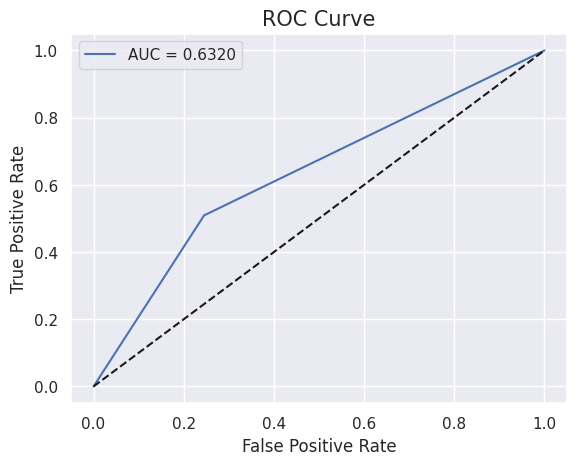

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = best_random_grid.predict(X_test)
df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['Y']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['Y'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['Y'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [113]:

from xgboost import XGBClassifier
XG = XGBClassifier(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = 100)
XG.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM = XG.predict(X_test)

print(confusion_matrix(Y_test,Y_pred_XG_SM))
print(accuracy_score(Y_test,Y_pred_XG_SM))
print(classification_report(Y_test,Y_pred_XG_SM))

[[121  34]
 [ 25  30]]
0.719047619047619
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       155
         1.0       0.47      0.55      0.50        55

    accuracy                           0.72       210
   macro avg       0.65      0.66      0.65       210
weighted avg       0.73      0.72      0.73       210



In [114]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"    :  [ 10,20,30,40,50,60,70,80,90,100]
    
}

In [115]:
import xgboost
XG_classifier=xgboost.XGBClassifier()

In [116]:
XG_search=RandomizedSearchCV(XG_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [117]:
XG_search.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM_RS = XG_search.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [118]:
best_xg = XG_search.best_estimator_
print(best_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [119]:
best_xg.fit(X_train_SM,Y_train_SM)
Y_pred_XG_SM_RS = best_xg.predict(X_test)

In [120]:
print(confusion_matrix(Y_test,Y_pred_XG_SM_RS))
print(accuracy_score(Y_test,Y_pred_XG_SM_RS))
print(classification_report(Y_test,Y_pred_XG_SM_RS))

[[121  34]
 [ 26  29]]
0.7142857142857143
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       155
         1.0       0.46      0.53      0.49        55

    accuracy                           0.71       210
   macro avg       0.64      0.65      0.65       210
weighted avg       0.73      0.71      0.72       210



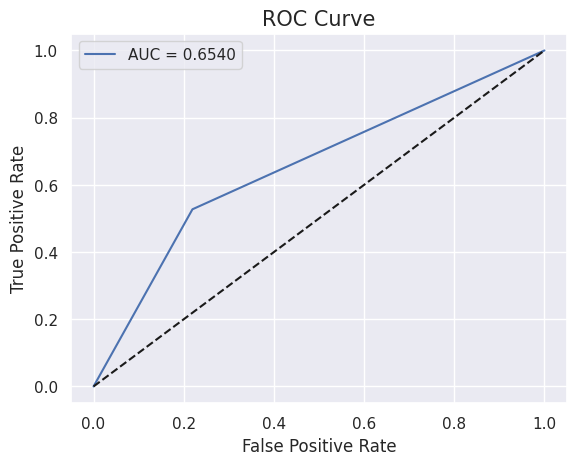

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba =  best_xg.predict(X_test)
df_actual_predicted = pd.concat([pd.DataFrame(np.array(Y_test), columns=['Y']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = Y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['Y'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['Y'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()